# Trabajo Final - Fundamentos de Data Science

## Proyecto - Bike Buyers

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics

### Carga de Datos

In [178]:
df = pd.read_csv("../Data/bike_buyers.csv")

### Inspección de Datos

In [179]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


### Eliminación de Variables Innecesarias

In [181]:
#No utilizaremos la variable ID del cliente
df_index = df['ID']
df.drop(['ID'],axis=1,inplace=True)

In [182]:
df_index[0:3]
df.dtypes

Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [183]:
df.head(3)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No


### Limpieza de Datos

In [184]:
#df['HomeOwner'] = df[['HomeOwner']].apply(lambda word: word=="Yes",axis=1)


#df['Age'].corrwith(df['Purchased Bike'])

<AxesSubplot:>

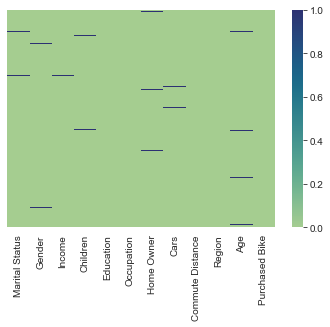

In [185]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')

In [201]:
def change(word):
    if (word=="Yes"):
        return 1;
    return 0;
df['Purchased Bike']= df['Purchased Bike'].map(change)
numericas = df.select_dtypes(include=('int64','float64')).columns.tolist()

df.dtypes
#df.head(20)
#for numeric in numericas:
#    print(numeric,df[numeric].co(df['Purchased Bike']))
sns.heatmap(df.corr())

Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike        int64
dtype: object

### Análisis de los Datos

#### Datos Null, Duplicados o Faltantes

In [187]:
df.isna().sum().sort_values()

Education            0
Occupation           0
Commute Distance     0
Region               0
Purchased Bike       0
Home Owner           4
Income               6
Marital Status       7
Children             8
Age                  8
Cars                 9
Gender              11
dtype: int64

In [188]:
df.dtypes

Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike        int64
dtype: object

<AxesSubplot:xlabel='Education', ylabel='count'>

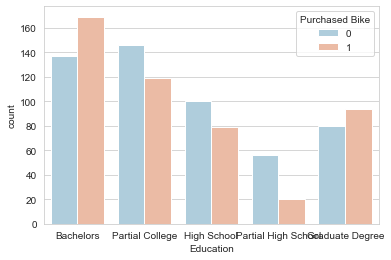

In [189]:
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Purchased Bike',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

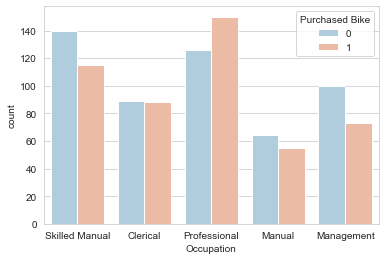

In [190]:
sns.set_style('whitegrid')
sns.countplot(x='Occupation',hue='Purchased Bike',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Cars', ylabel='count'>

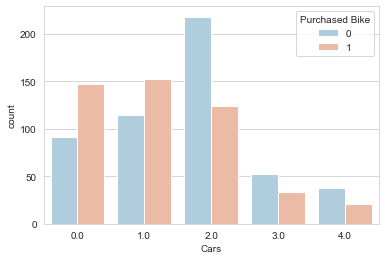

In [191]:
sns.set_style('whitegrid')
sns.countplot(x='Cars',hue='Purchased Bike',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Purchased Bike', ylabel='count'>

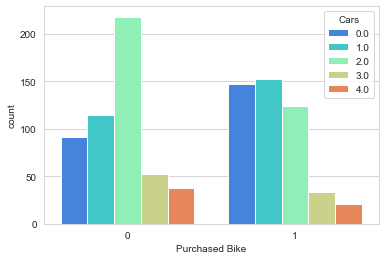

In [192]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased Bike',hue='Cars',data=df,palette='rainbow')

<AxesSubplot:xlabel='Purchased Bike', ylabel='count'>

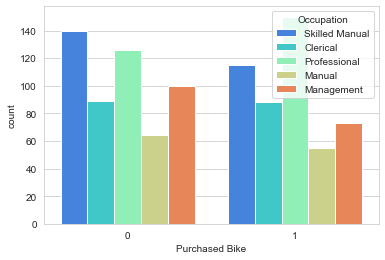

In [193]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased Bike',hue='Occupation',data=df,palette='rainbow')

<AxesSubplot:xlabel='Purchased Bike', ylabel='count'>

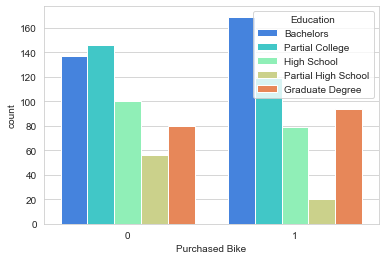

In [194]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased Bike',hue='Education',data=df,palette='rainbow')

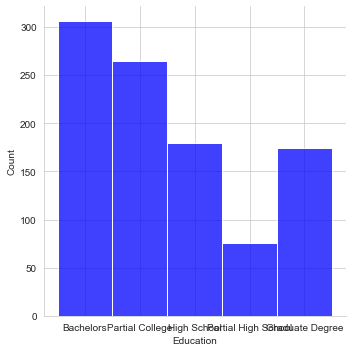

In [195]:
sns.displot(df['Education'],kde=False,color='blue',bins=30)

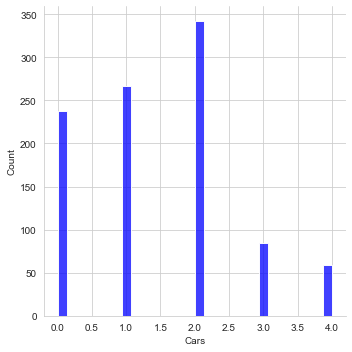

In [196]:
sns.displot(df['Cars'],kde=False,color='blue',bins=30)

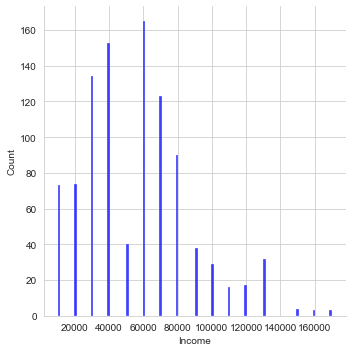

In [197]:
sns.displot(df['Income'],kde=False,color='blue',bins=100)

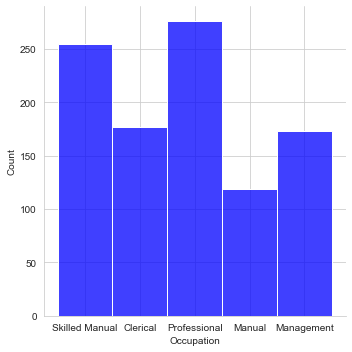

In [198]:
sns.displot(df['Occupation'],kde=False,color='blue',bins=100)

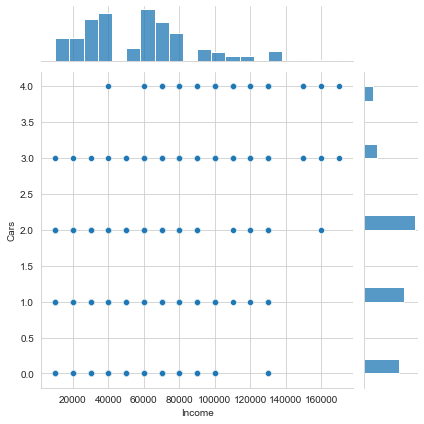

In [199]:
sns.jointplot(x='Income',y='Cars',data=df,kind='scatter')

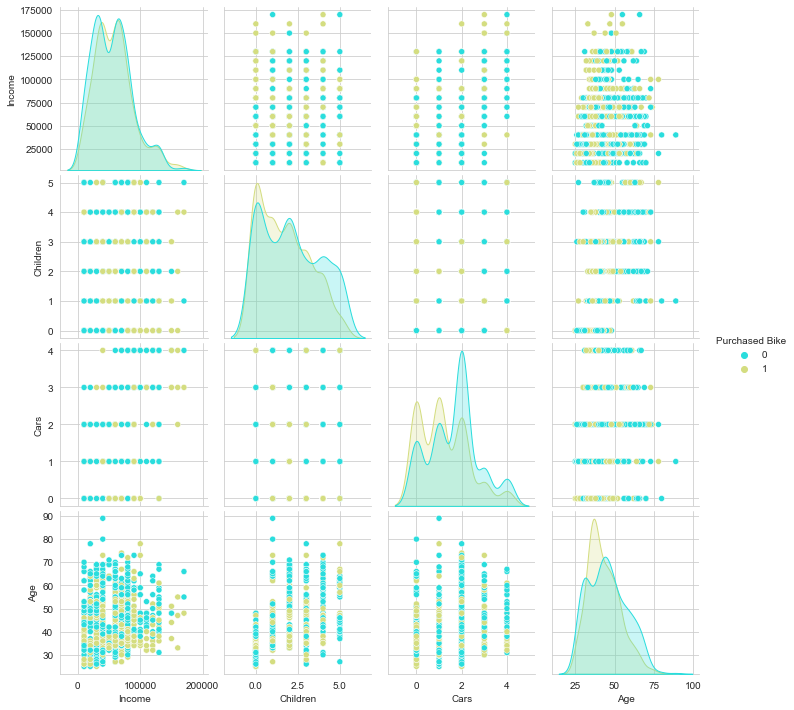

In [200]:
sns.pairplot(df,hue='Purchased Bike',palette='rainbow')